In [2]:
source('/d0-mendel/home/meisl/bin/FunctionLib/Lib/pagodaLib.r')
source('/d0-bayes/home/meisl/bin/bin/signature.score.R')
#source('/d0-mendel/home/meisl/Workplace/neuroblastoma/immune/Figures//density.R')

source('/d0-bayes/home/meisl/bin/bin/signature.score.R')


In [5]:
scon  = readRDS('conos.T.rds')
load('anoT.RData')

In [4]:
setwd('./Tcell')

[1] "CD8A"
[1] "PDCD1"
[1] "HAVCR2"
[1] "CTLA4"
[1] "TOX"
[1] "TIGIT"


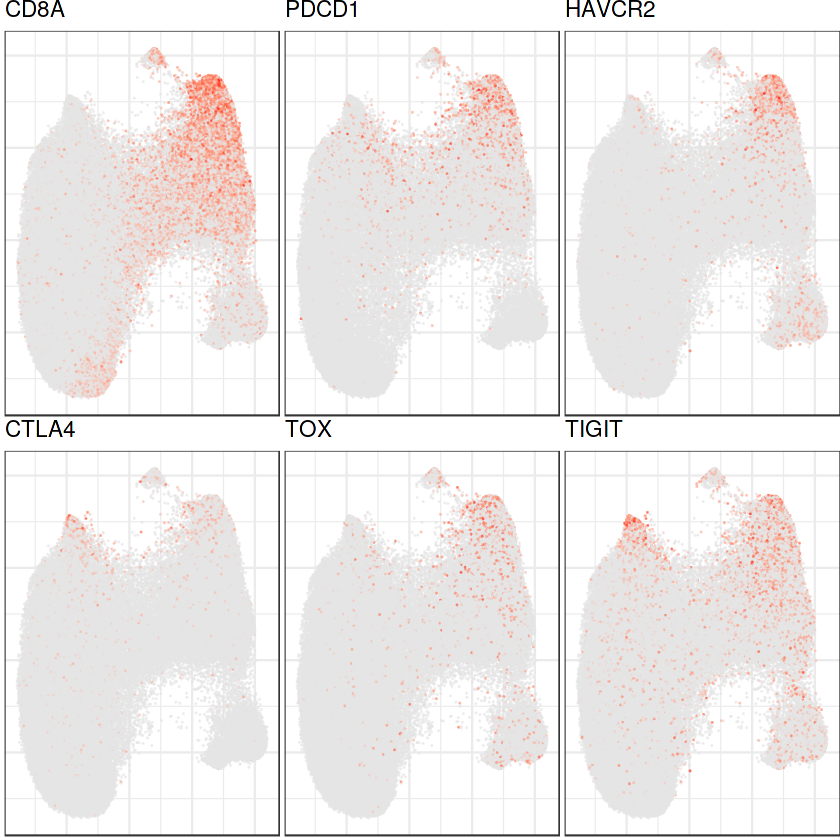

In [9]:
features = c('CD8A','PDCD1','HAVCR2','CTLA4','TOX','TIGIT')

pl=lapply(sn(features), function(x) {print(x);
   scon$plotGraph(gene=x, title=x,size=0.005,alpha=0.5,raster = T,plot.na=F)})

b=plot_grid(plotlist=pl, nrow = 2)
b

ggsave('F3C.exp.ev2.pdf',b,height=3.6,width=5.1)

[1] "NT5E"
[1] "LAYN"
[1] "ENTPD1"
[1] "CTLA4"
[1] "TNFRSF18"
[1] "IL2RA"
[1] "LAG3"
[1] "TGFB1"
[1] "TNFRSF4"
[1] "FOXP3"
[1] "LGALS1"
[1] "IL10"
[1] "BTLA"
[1] "ICOS"
[1] "TIGIT"
[1] "TNFRSF9"
[1] "CD70"
[1] "IKZF2"


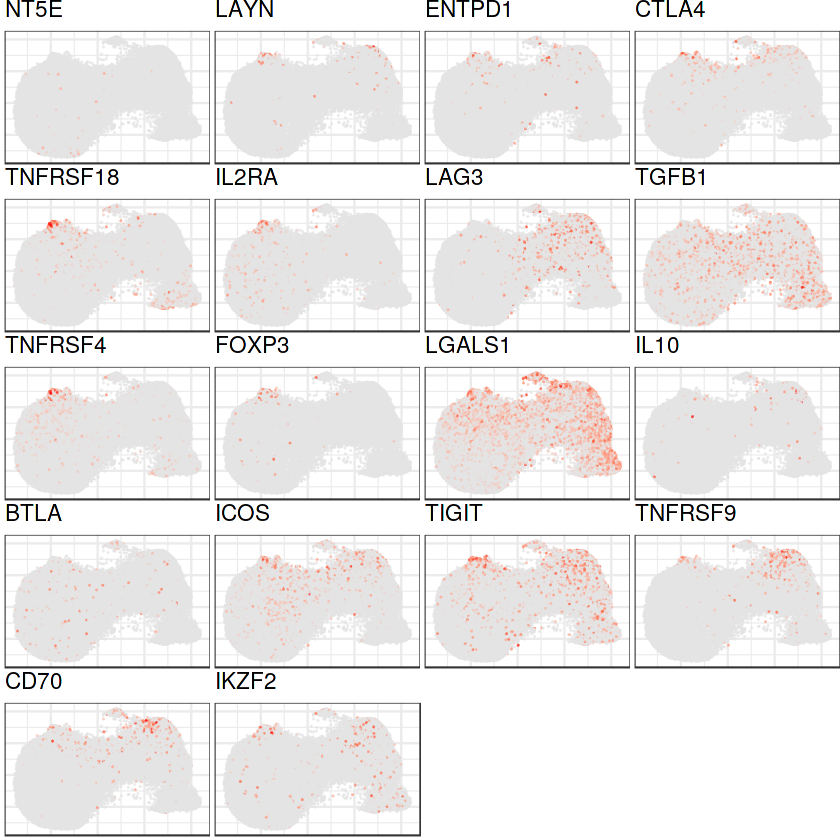

In [8]:
# Tcell.fig.ipynb

features = glist$TregActivity

pl=lapply(sn(features), function(x) {print(x);
   scon$plotGraph(gene=x, title=x,size=0.01,alpha=0.6,raster = T,plot.na=F)})

b=plot_grid(plotlist=pl, nrow = 5)
b

Using SampleType as value column: use value.var to override.



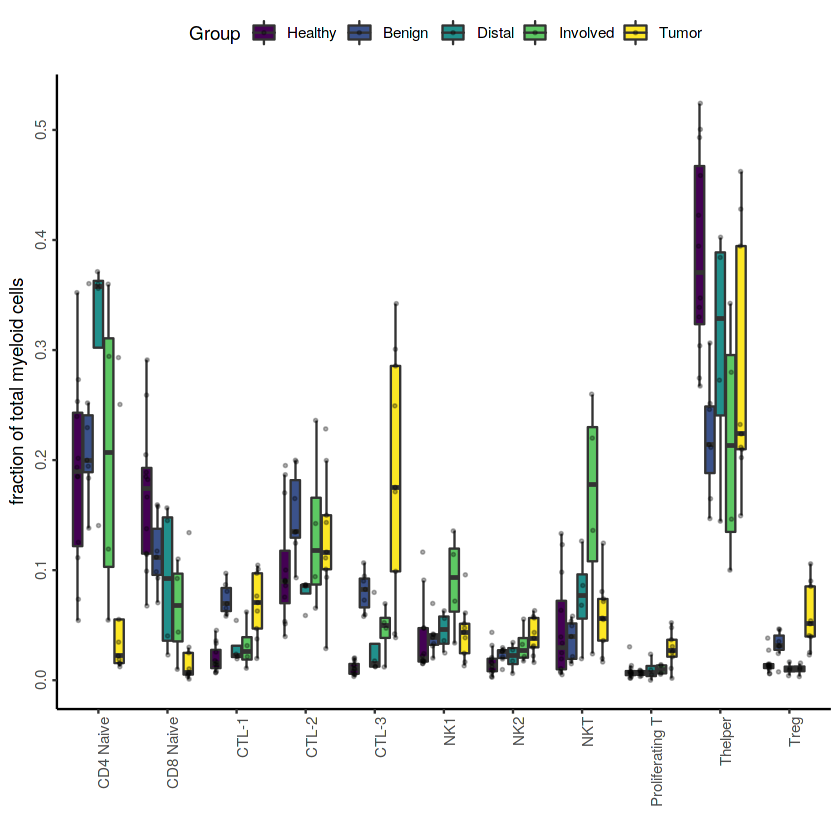

In [6]:

cellProportion  = function(scon){
    cname = names(scon$misc$cell.type)
    ano2=data.frame('Cell'=scon$misc$cell.type[cname],'SampleType'=scon$misc$cell.sample[cname])

    # Annotation vs sample
    tmp2 <- acast(ano2, Cell ~ SampleType, fun.aggregate=length)

    tmp3 <- (sweep(tmp2, 2, colSums(tmp2), FUN='/'))
    tmp4 <- melt(tmp3)
    head(tmp4)

    names(tmp4) <- c('cell', 'sample','pc.of.sample')

    tmp4$Group=NULL
    tmp4$Group=scon$misc$sample.groups[as.character(tmp4$sample)]


    p <- ggplot(na.omit(tmp4),aes(x=cell,y=pc.of.sample,dodge=Group,fill=Group))+geom_boxplot(notch=FALSE,outlier.shape=NA)  +  geom_point(position = position_jitterdodge(jitter.width=0.1),color=adjustcolor(1,alpha=0.3),pch=19,size=0.5)+theme_classic()+
      theme(axis.text.x = element_text(angle = 90, hjust = 1), axis.text.y = element_text(angle = 90, hjust = 0.5))  +xlab("") +ylab("fraction of total myeloid cells")+theme(legend.position="top") #+
    #  scale_fill_manual(values=fraction.palette1)
    return(p)
    }
cellProportion(scon)

In [21]:
cname=names(anoT2)

exp <- do.call(rbind,lapply(sn(c(features,'CCR8')),function(gene) conos:::getGeneExpression(scon,gene)))
exp[is.na(exp)]=0
dim(exp)


[1]    19 65860

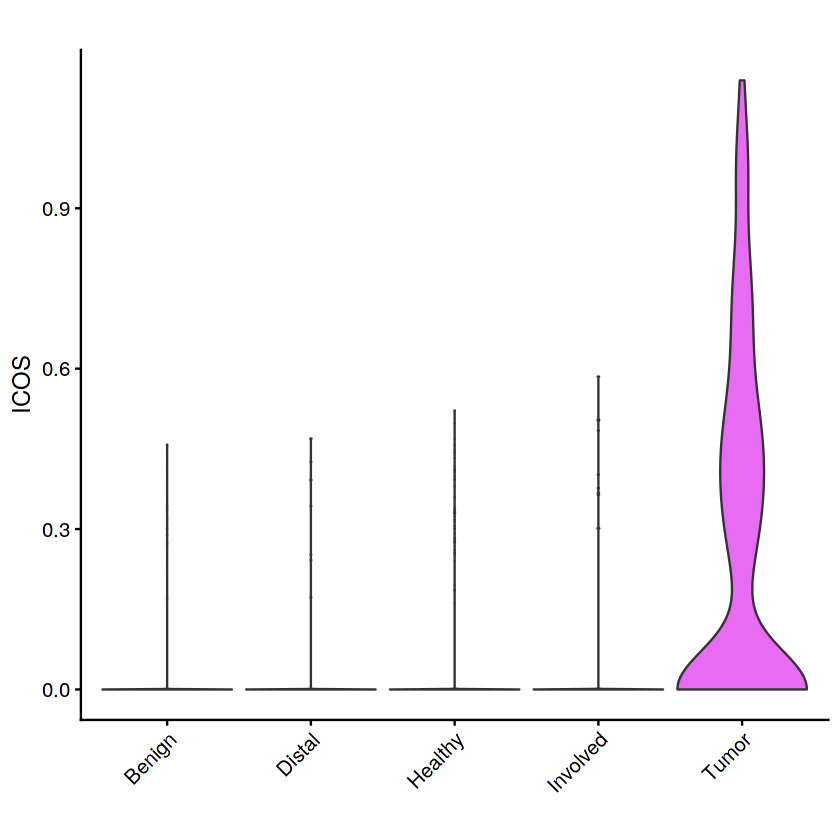

In [24]:

cname = scon$misc$cell.type %>% .[.=='Treg'] %>% names()

fig1 = modify_vlnplot1('ICOS', 
        scon$misc$stype[cname], exp, colp = NULL, pt.size = 0,stack = FALSE)+theme(legend.position='none')
fig1

In [26]:


stacked.plot(scon$misc$stype[cname],c('ICOS','CTLA4','TNFRSF4','TNFRSF18'),exp,fraction.palette1,'Treg.pdf',pt.size = 0)

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



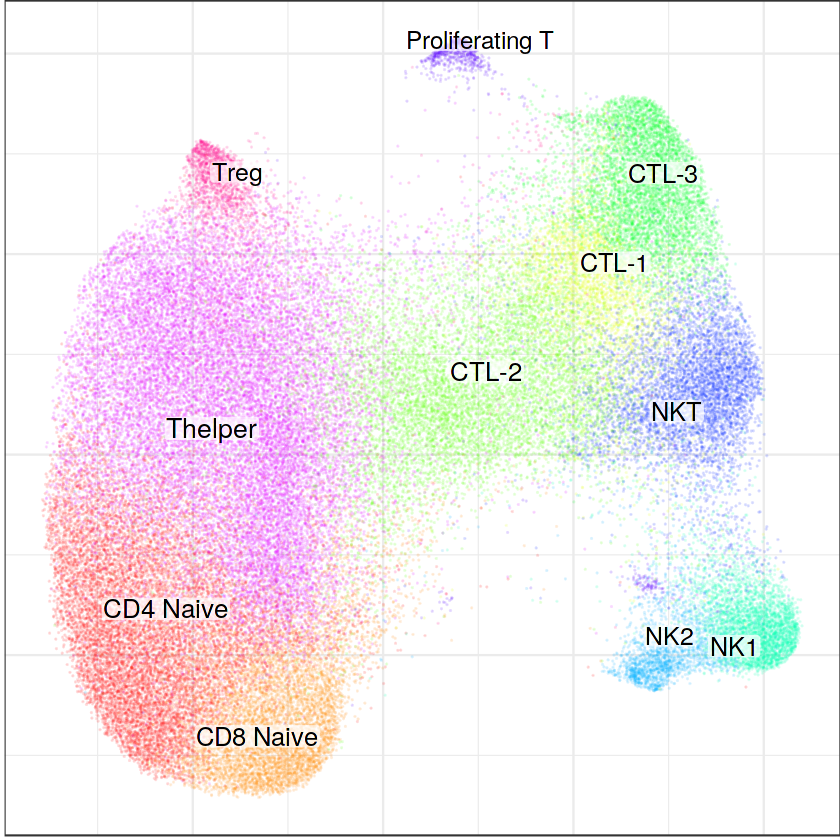

In [6]:
a2=scon$plotGraph(groups=anoT,raster=TRUE,plot.na=F,size=0.1,alpha=0.1,font.size = c(5, 5.5),palette=anoT.palf)
a2

In [15]:
table(scon$misc$cell.type)


      CD4 Naive       CD8 Naive           CTL-1           CTL-2           CTL-3 
          10863            6357            3280            8316            5614 
            NK1             NK2             NKT Proliferating T         Thelper 
           3539            1958            5036             840           18133 
           Treg 
           1924 

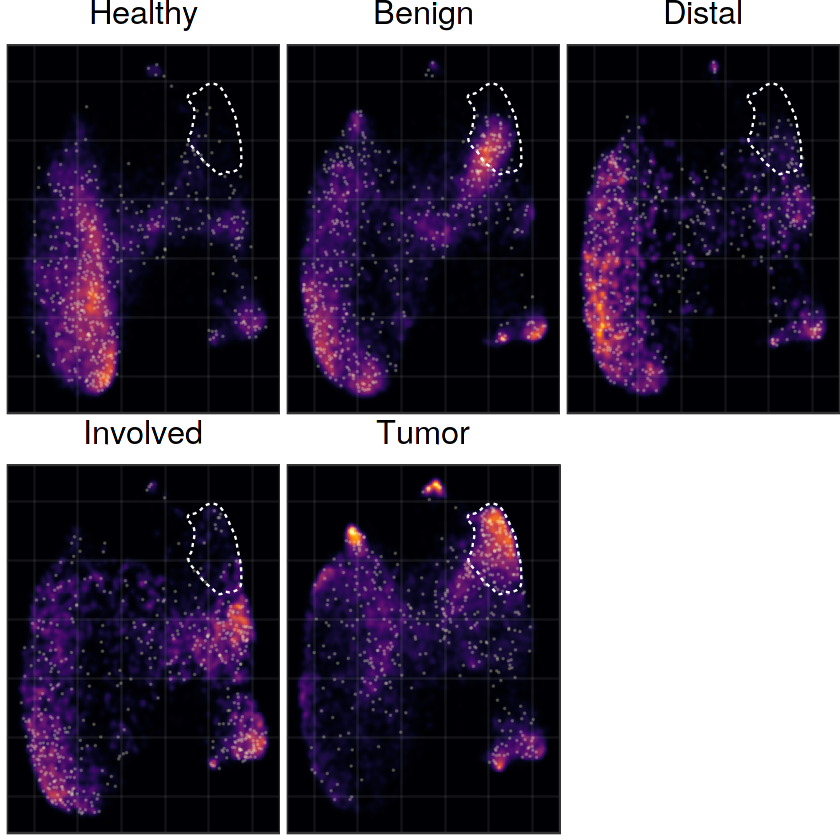

In [9]:

pl = density.figure2(scon,fres,scon$misc$sample.groups,Toch(scon$misc$cell.type),countour = c('CTL-3'),show.legend =FALSE,point.col = '#FCFDBFFF')



b=  cowplot::plot_grid(plotlist=pl[c(3,1,2,4,5)], ncol=3, nrow=2)
b

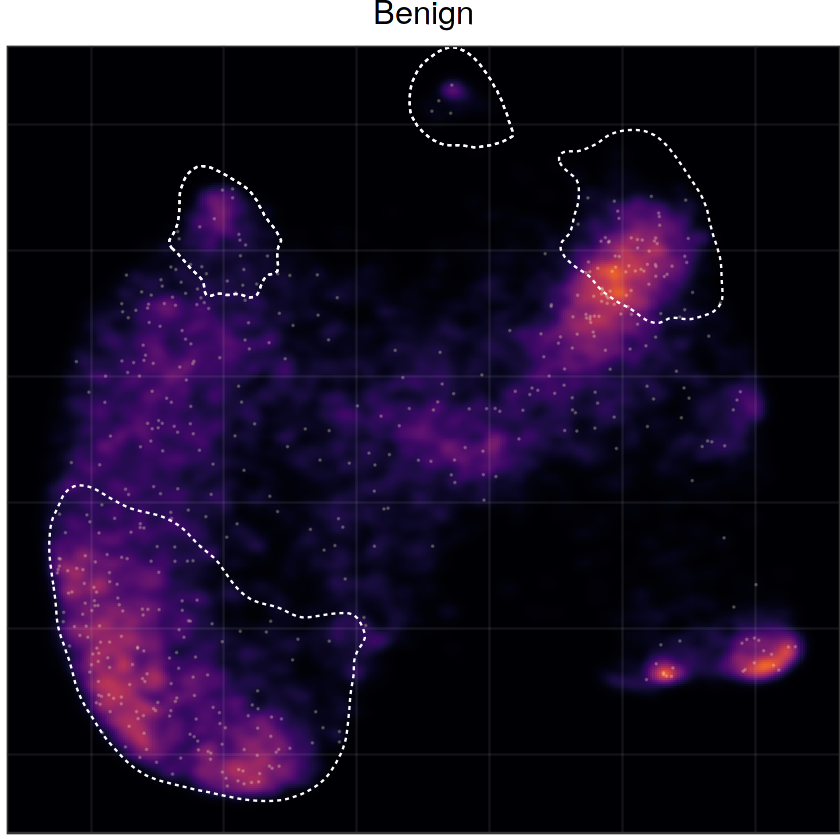

In [22]:
tmp = Toch(scon$misc$cell.type)

tmp[grepl('Naive',tmp)]='Naive'
c2 = getDensityContours(scon$embedding, cell.groups = Toch(scon$misc$cell.type), 
                group = 'Treg',conf = "24%")


c3= getDensityContours(scon$embedding, cell.groups = Toch(scon$misc$cell.type), 
                group = 'Proliferating T',conf = "15%")

c4= getDensityContours(scon$embedding, cell.groups = tmp, 
                group = c('Naive'),conf = "10%")

pl[[1]]+c2+c3+c4

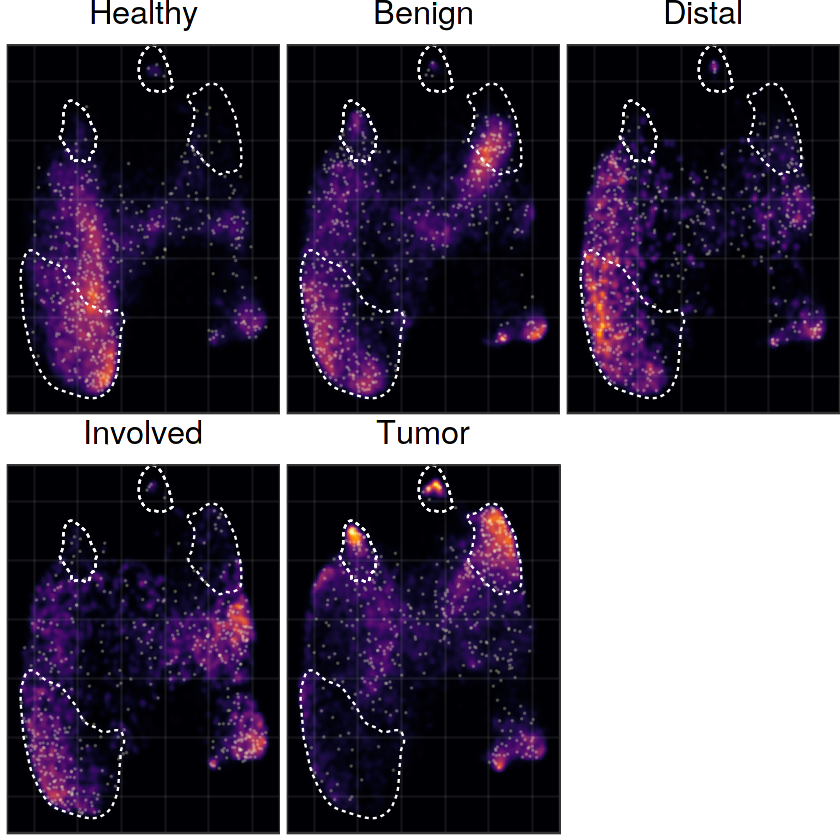

In [24]:
pl = lapply(pl,function(x) x+c2+c3+c4)
b=  cowplot::plot_grid(plotlist=pl[c(3,1,2,4,5)], ncol=3, nrow=2)
b

In [25]:
ggsave('F3B.pdf',b,width = 12,height=8.4)
ggsave('F3B.png',b,width = 12,height=8.4)

In [9]:
ylab='Exhaustion score'
ff='/d0-bayes/home/meisl/bin/data/manouk/Exhau.txt'

readG=function(f){
  tmp=read.csv(f,sep='\t',header=F)
  as.character(tmp[,1])
}

Exh=readG(ff)

cname=names(sano)

genes=Exh[6:length(Exh)]


exp <- do.call(rbind,lapply(sn(genes),function(gene) conos:::getGeneExpression(scon,gene)))
exp[is.na(exp)]=0
dim(exp)
                            
genes

[1]    32 65860

[1] "TOX"    "NR4A1"  "NR4A2"  "NR4A3"  "PDCD1"  "CTLA4"  "TIGIT"  "HAVCR2"
 [9] "LAG3"   "BTLA"   "CD244"  "TBX21"  "EOMES"  "BLIMP1" "NFAT"   "BATF"  
[17] "VHL"    "FOXO"   "FOXP1"  "ENTPD1" "CXCL13" "MYO1E"  "PRDM1"  "WARS"  
[25] "CREM"   "PRDM1"  "LAYN"   "PHLDA1" "SNAP47" "CD38"   "MYO7A"  "PARK7"

In [12]:
library(ggpubr)
df=Signature_score(as.factor(sano[cname]),genes,t(exp),scon$misc$stype[cname],ssamp,min.num.cell=10,magnitude.normal = TRUE)



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.01048 0.02112 0.02890 0.03755 0.26456 


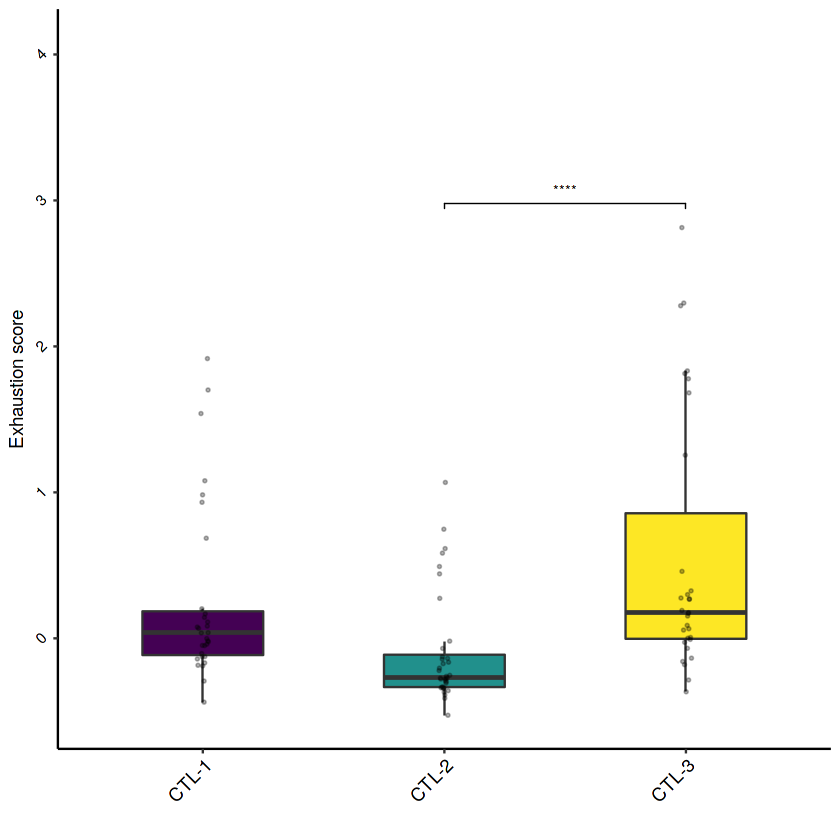

In [14]:

df= df[df$cell %in% c('CTL-1','CTL-2','CTL-3'),]
p1=drawBoxplot('CTL',df,ylab,myeloid.col=NULL,limHeight=1.45,height=2.5,width=2.4,sigl=c('CTL-2','CTL-3'))
p1

Warning message:
“Removed 3 rows containing missing values (geom_signif).”


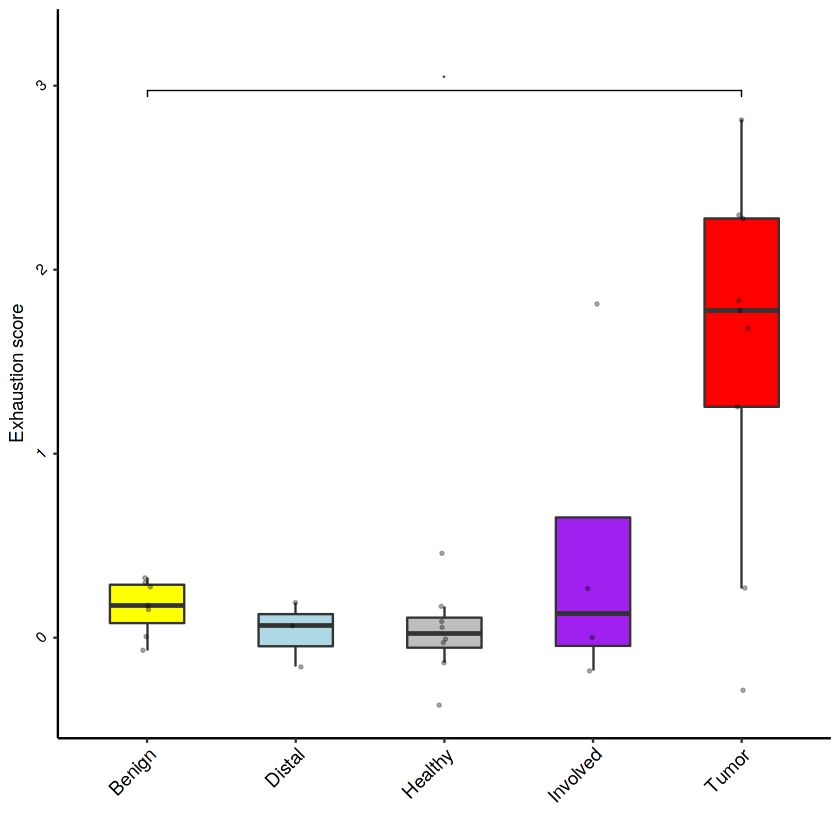

In [16]:
df = readRDS('Exhaustion score.dat.rds')

df2=df[df$cell=='CTL-3',]
df2$cell=df2$fraction


p2=drawBoxplot('CTL-3',df2,ylab,myeloid.col=fraction.palette1,limHeight=1.15,height=2.4,width=2,dsize=2)
p2

In [30]:
df1 = readRDS('cell.fraction.data.rds')
df2 = readRDS('../myeloid/cell.fraction.data.rds')

In [31]:
df1[1:3,]
colnames(df1)[3] = 'value'
colnames(df2)[3] = 'value'

Mdf<- dcast(df2, cell~sample)
Tdf<- dcast(df1, cell~sample)
rownames(Mdf) = Mdf[,1]
rownames(Tdf) = Tdf[,1]
Tdf[,1]=NULL
Mdf[,1]=NULL

inter = intersect(colnames(Tdf),colnames(Mdf))
Tdf=Tdf[,inter]
Mdf=Mdf[,inter]

mat = Tdf


,cell,sample,pc.of.sample,Group
,<fct>,<fct>,<dbl>,<ord>
1,CD4 Naive,A,0.18487395,Healthy
2,CD8 Naive,A,0.18487395,Healthy
3,CTL-1,A,0.03361345,Healthy


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



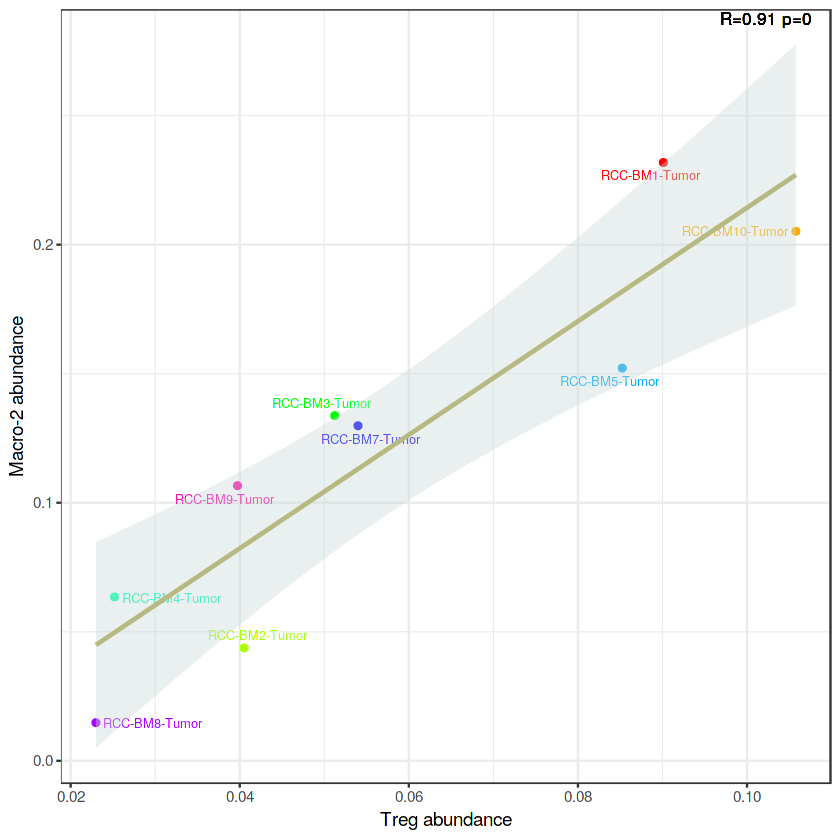

In [34]:

library(ggrepel)

i = 'Treg'
j = 'Macro-2'
x=mat[i,] %>% as.numeric()
y=dd[j,] %>% as.numeric()
dat1 = data.frame('x'=x,'y'=y,'name' = colnames(mat))

dfig(dat1,i,j,samples.color=rainbow(nrow(dat1)))
    

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



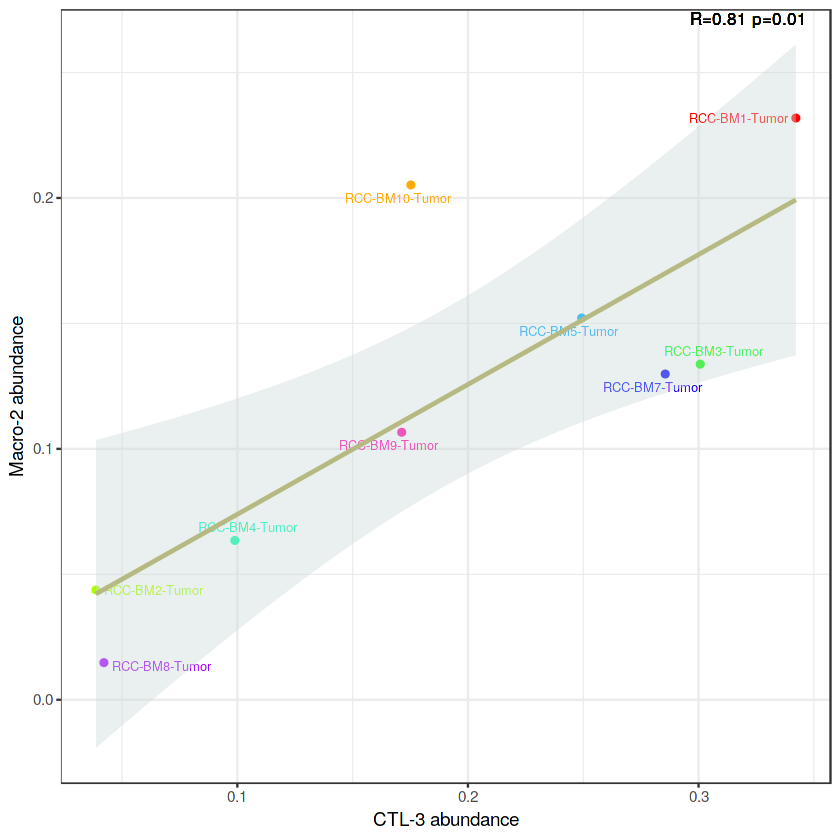

In [36]:
library(ggrepel)

i = 'CTL-3'
j = 'Macro-2'
x=mat[i,] %>% as.numeric()
y=dd[j,] %>% as.numeric()
dat1 = data.frame('x'=x,'y'=y,'name' = colnames(mat))

dfig(dat1,i,j,samples.color=rainbow(nrow(dat1)))
    